### Programming Assignment 6.1: Reducing the number of colors in an image

- use the K-Means algorithm
- work with unsupervised learning problems (w/o teacher)
- work with images in Python

In [93]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from skimage.io import imread
import skimage as ski 
import pylab

Чтобы загрузить изображение, необходимо выполнить следующую команду: 
    
    image = imread('parrots_4.jpg')

После этих действий переменная image будет содержать изображение в виде numpy-массива размера n * m * 3, где n и m соответствуют размерам изображения, а 3 соответствует формату представления RGB.

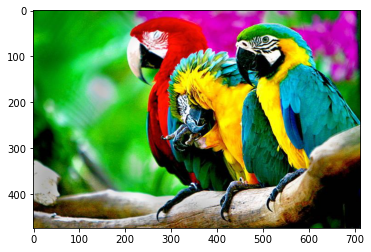

In [15]:
image = imread('parrots.jpg')
pylab.imshow(image)

In [244]:
# переводим картинку в 3х мерный вектор (474, 713, 3)
# [[[0.01568627, 0.49411765, 0.01960784], [0.00784314, 0.49411765, 0.00784314]],
# ...
# [[0.00784314, 0.49411765, 0.00784314], [0.00784314, 0.49411765, 0.00784314]]]
matrix = ski.img_as_float(image)

In [246]:
# переводим 3х мерный вектор в двумерный - в матрицу объекты-признаки 
# где строки – это наши объекты – пиксели,
# каждый хар-ся тремя координатами - значениями интенсивности в пространстве RGB.
arr = []

for row in matrix:
    for col in row:
        arr.append(col)
        
X = np.array(arr)
X.shape

(337962, 3)

In [262]:
model = KMeans(init='k-means++', random_state=241, n_clusters = 20)
model.fit(X)

KMeans(n_clusters=20, random_state=241)

In [319]:
def get_clustered_image(cluster_centers, labels):
    # cluster_centers_ - это матрица "кластер - цвет" этого кластера
    # переведем матрицу в словарь "номер кластера" - "цвет"
    cluster_2_color = {}
    for clstr, clr in enumerate(model.cluster_centers_):
        cluster_2_color[clstr] = clr

    # labels_ – массив со значениями кластеров для каждого пикселя исходной картинки
    # заменим значения кластеров на значения цветов
    pixels = [cluster_2_color[clstr] for clstr in labels]
    clustered_image = np.reshape(pixels, (474, 713, 3))
    
    # полчули картинку в виде 3х мерного вектора (474, 713, 3), где вместо изначальных цветов – цвета кластеров
    return clustered_image

In [265]:
# и вот что получилось
clustered_image = get_clustered_image(model.cluster_centers_, model.labels_)

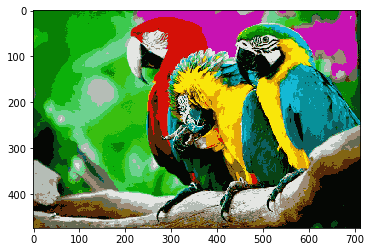

In [321]:
# кластеризованная картинка
plt.imshow(clustered_image, interpolation='nearest')
plt.show()

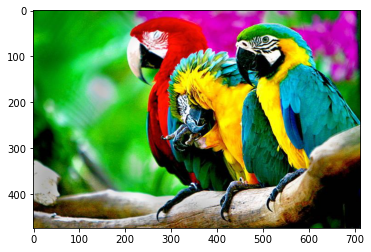

In [322]:
# оригинал
pylab.imshow(image)
plt.show()

### считаем PSNR – peak signal-to-noise ratio

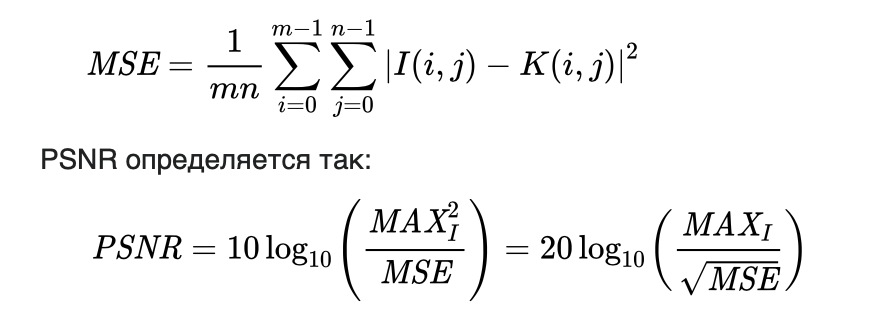

#### Для цветных изображений с тремя компонентами RGB на пиксель применяется такое же определение PSNR, но MSE считается по всем трем компонентам (и делится на утроенный размер изображения).

In [328]:
# MAXi = 1, а не 255 потому что у нас не RGB, а float значения в матрице
def psnr(inital, clustered):
    summa = np.mean(np.square(inital - clustered))
    return 10 * np.log10(1/summa)

In [330]:
for n in range(8,14):
    model = KMeans(init='k-means++', random_state=241, n_clusters = n)
    model.fit(X)
    clustered_image = get_clustered_image(model.cluster_centers_, model.labels_)

    print(f'n = {n}, psnr = {psnr(matrix, clustered_image)}')

n = 8, psnr = 18.436753985403197
n = 9, psnr = 19.11253729789842
n = 10, psnr = 19.63964006985411
n = 11, psnr = 20.12752347671433
n = 12, psnr = 20.592238697544882
n = 13, psnr = 21.021028972388194


#### Найдите минимальное количество кластеров, при котором значение PSNR выше 20
Ответ: 11